In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
import random

```{index} Bayesian hypothesis testing
```

```{index} hypothesis testing; Bayesian
```

## Bayesian Hypothesis Testing

In Chapter 2-5, we introduced null hypothesis significance testing (NHST) via resampling.  In NHST, we assign significance to some observed statistic if the value of the statistic has a very low probability of occurring under some testable null hypothesis. This approach is very common, but it also has some problems:
* NHST cannot utilize information from other source about the probability of a hypothesis being true;
* NHST can only evaluate the probability of seeing such an extreme value of a statistic under the null hypothesis; it cannot assign probabilities to the null and alternative hypotheses;
* Moreover, NHST is not easily generalized to handle multiple possible hypotheses;
* The result of an NHST (the $p$ value) is often misinterpreted and $p$-values are often subject to manipulation through "$p$ hacking".

NHST can be considered a *frequentist* technique because it only involves counting how often we see a certain type of value under the null hypothesis.

An alternative is to use a *Bayesian hypothesis test* in which the goal is to estimate the *a posteriori* probability of the possible hypotheses.

To simplify the introduction to this approach, let's use a slightly modified version of our first statistical test, which we introduced in Chapter 2:

You find an odd coin. Suppose you flip the coin 8 times and it comes up tails on every flip. You would like to conduct a statistical test to determine if it is a fair coin.  If it were a fair coin, then there is one outcome of "all tails" among the $2^8$ possible outcomes, meaning that the probability of observing all tails is


In [2]:
1/2**8

0.00390625

Under the NHST approach, you would determine the probability of seeing an outcome that is at least this extreme under the null hypothesis, which would typically be that the coin is a fair coin. However, under a Bayesian approach we can find the *a posteriori* probability that this is a fair coin given this observation.

Unlike NHST, we will have to establish a model for all the possible behaviors of the coin and assign probabilities to this model. Let's start with the simplest possible model that might fit our observations:
**the coin is either fair or it has tails on both sides**.

Now, let's establish some notation.

Let:

$F$ = event the coin is fair

(Then $\overline{F}$ = even that the coin has tails on both sides.)


$E$ = event that coin comes up tails on 8 consecutive flips


Then we wish to estimate the APP $P(F|E)$. As usual, we do not have direct knowledge of this type of probability. In addition, we know from our previous work in this chapter that we generally need to know the *a priori* probabilities. For the model we have chosen, we need to know $P(F)$ and $P(\overline{F}) = 1 -P(F)$.

Given the *a prioris*, we can find $P(F|E)$ in two ways:


1. We can run a simulation of the system

2. We can calculate it using Bayes' rule

Although approach 2 is tractable for this simple problem, let's apply approach 1, since this approach is applicable to a larger class of problems.

We need the *a priori* probabilities, but there is no way for us to know the true *a prioris*. So what to do?

We will have to choose the *a prioris*. How? There are 2 typical approaches:

1. **Uninformative prior**: We choose a prior that basically assumes as little information about the inputs as possible. For discrete inputs, this will often be equally likely probabilities

2. **Informative prior**: We choose a prior based on other knowledge of the problem.

Below, we consider both of these approaches and compare the effect of these assumptions on the *a posteriori* probabilities and on our conclusions:

```{index} uninformative prior
```

```{index} prior; uninformative
```

### Uninformative Prior

Let's assume that the probabilities that coin is fair or two-tailed are equally likely:

In [3]:
# How many sets of coin flip events to simulate
num_sims=1000000


# This is the number of flips and the target for the event E
flips=8

# Set up some counters. As we saw before, when we estimate a conditional probability, 
# we generally need two counters:
event_count=0
fair_count=0

# We have two types of coins:
cointypes=['fair','twotail']

for sim in range(num_sims):
    
    # Choose a coin at random and set up the sample space for the coin flip:
    cointype=random.choice(cointypes)
    if cointype == 'fair':
        faces=['H','T']
    else:
        faces=['T','T']
    
    # Now flip the coin the required number of times:
    coins=random.choices(faces, k=flips)
    
    # Count how many tails were observed
    num_tails=coins.count('T')
 
    # Check if E occurred and update counter if it did
    if num_tails==flips:
        event_count+=1
        
        # Now check that the event F occurred when E occurred and update the counter:
        if cointype == 'fair':
            fair_count+=1
            
            
print("Prob. of fair coin given that",flips,"tails observed is", fair_count/event_count)

Prob. of fair coin given that 8 tails observed is 0.004110239867130857


An alternative to directly counting the number of events $F$ when $E$ is observed is to instead keep a list of all the events ($F$ or $\overline{F}$) when $E$ is observed. We will find this approach helpful if we consider a more complicated model for the behavior of the coin. Below is the code to save those events to a list:

In [4]:
# How many sets of coin flip events to simulate
num_sims=1000000


# This is the number of flips and the target for the event E
flips=8

# Instead of counters, just keep track of the system states when
# the output event E is observed:
events = []

# We have two types of coins:
cointypes=['fair','twotail']

for sim in range(num_sims):
    
    # Choose a coin at random and set up the sample space for the coin flip:
    cointype=random.choice(cointypes)
    if cointype == 'fair':
        faces=['H','T']
    else:
        faces=['T','T']
    
    # Now flip the coin the required number of times:
    coins=random.choices(faces, k=flips)
    
    # Count how many tails were observed
    num_tails=coins.count('T')
 
    # Check if E occurred and update counter if it did
    if num_tails==flips:
        events+=[cointype]
        


In [5]:
events.count('fair')/len(events)

0.003952648034749782

In [6]:
events.count('twotail')/len(events)

0.9960473519652502

We can easily create a histogram from this data. However, since the system states are not numerical, we cannot use the normal `plt.hist()` function. Instead, we will use Matplotlib's `plt.bar()` function:

```{index} plot; bar
```


In [7]:
? plt.bar

Signature:
 plt.bar(
    x,
    height,
    width=0.8,
    bottom=None,
    *,
    align='center',
    data=None,
    **kwargs,
)
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *width* and *height*. The vertical baseline
is *bottom* (default 0).

Each of *x*, *height*, *width*, and *bottom* may either be a scalar
applying to all bars, or it may be a sequence of length N providing a
separate value for each bar.

Parameters
----------
x : sequence of scalars
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : scalar or sequence of scalars
    The height(s) of the bars.

width : scalar or array-like, optional
    The width(s) of the bars (default: 0.8).

bottom : scalar or array-like, optional
    The y coordinate(s) of the bars bases (default: 0).

align : {'center', 'edge'}, optional, default: 'center'
    Alignment of the bars to the *x* coordinates:



From the call signature, we can see that `plt.bar()` has two required arguments:
* The first argument, `x`, is a sequence that contains the values
* The second argument, `height` contains a sequence of heights for each value

We will pass the `cointypes` list and a list of the estimated probabilities for each coin type, which we calculate using the relative frequencies from our simulation:

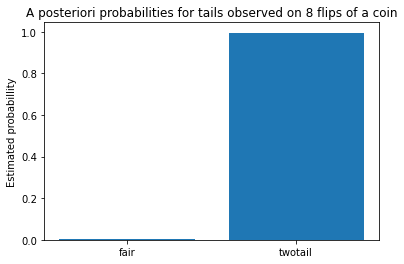

In [8]:
plt.bar(cointypes,[events.count('fair')/len(events),events.count('twotail')/len(events)])
plt.ylabel('Estimated probabillity');
plt.title('A posteriori probabilities for tails observed on 8 flips of a coin');

Note that the value of the probability for the fair coin is so small that we cannot read it from the graph. We can overcome this by plotting these bars on a logarithmic scale. However, we should note that the heights of the bars will no longer be in proportion to the probabilities when shown on a log-scale, so we should use this with caution.

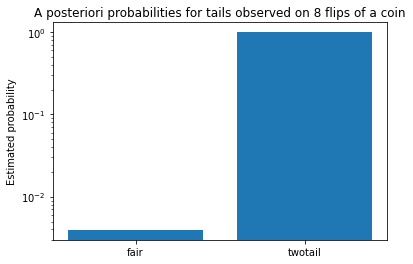

In [9]:
plt.bar(cointypes,[events.count('fair')/len(events),events.count('twotail')/len(events)])
plt.yscale('log')
plt.ylabel('Estimated probability');
plt.title('A posteriori probabilities for tails observed on 8 flips of a coin');

Now that you see this result, you can say that the chance that the coin was a fair coin was very small indeed. But would you be willing to show this job to your boss if your job were on the line? What could go wrong?

The most likely thing to go wrong is that your boss would say: "**How many coins have you found that have tails on both side?**" I have never found a coin with two tails after handling coins for decades.  That means that you have some information that you could use to choose a prior other than the uninformative prior. We consider how to handle that next.

```{index} prior; informative
```

## Informative prior

Given our prior experience, we can say that a randomly chosen coin has a very small probability of having tails on both sides. So, the *a priori* probabilities should not be equal to 0.5. The *a posteriori* probabilities will depend on the particular values chosen for the *a prioris*. However, if you bias these probabilities too much, then it will give someone viewing your results yet another point of criticism. So, for instance, if you say that the probability of finding a two-tailed coin is 1 in 1,000,000, then you may be forced to defend why that particular value. But, if you assume that the probability of a two-tailed coin is 1/100 and still find that there is a reasonable probability that the coin is fair, then that is much easier to defend. To make assessing this tradeoff easier, let's create a function that can simulate the *a posteriori* probabilities for any choice of the probability of a two-tailed coin.

The `random.choices()` function has a `weights` keyword parameter that can be used to change the probability of the choices according to input probabilties or other weightings.

In [10]:
def coin_bayes(prob_2tails = 0.5, flips = 8, num_sims= 1_000_000):
    # Set up some counters. As we saw before, when we estimate a conditional probability, 
    # we generally need two counters:
    event_count=0
    fair_count=0

    # We have two types of coins:
    cointypes=['fair','twotail']

    for sim in range(num_sims):

        # Choose a coin at random and set up the sample space for the coin flip:
        cointype=random.choices(cointypes, weights=[1 - prob_2tails, prob_2tails] )[0]
        if cointype == 'fair':
            faces=['H','T']
        else:
            faces=['T','T']

        # Now flip the coin the required number of times:
        coins=random.choices(faces, k=flips)
        #print(cointype, faces, coins)

        # Count how many tails were observed
        num_tails=coins.count('T')

        # Check if E occurred and update counter if it did
        if num_tails==flips:
            event_count+=1

            # Now check that the event F occurred when E occurred and update the counter:
            if cointype == 'fair':
                fair_count+=1


    return fair_count/event_count

Let's start by checking the output of our function for the uninformative prior, which uses the default value of `prob_2tails = 0.5`:

In [11]:
coin_bayes()

0.0040045949136858225

Now, we can check how the answer varies if we set the probability of finding a two-tailed coin to 1/100:

In [12]:
coin_bayes(prob_2tails = 1/100)

0.27514341732626535

The *a posteriori* value of the coin being fair will increase when the probability of finding a two-tailed coin decreases:

In [13]:
coin_bayes(prob_2tails = 1/1000)

0.7894519983518747

Even though the chance of getting 8 heads on 8 flips of a fair coin is very small, the *a posteriori* probability of the coin being fair can be large if the *a priori* probability of the coin being two-tailed is very small. 

If we return to what we could be confident in telling our boss, we can say that if the probability of finding a two-tailed coin  is less than 1/100, then the probability that the coin is fair is greater than 0.28. Although this probability is still less than 1/2, it is large enough that we can't classify this as a rare occurrence. 

**Example** What prior makes it equally likely for the coin to be fair or two-headed?

Let's try to analyze this using conditional probability. Let $T_i$ be the event that the coin came up tails on flip $i$. If the coin is fair, then the outcomes of the individual flips are independent, so

$$
P(E|F) = P\left( \bigcap_{i=0}^{7} T_i  \right)= \prod_{i=0}^{7} P\left( T_i \right) 
= \left( \frac 1 2  \right) ^ 8 = \frac{ 1} {256}
$$

Clearly, $P\left(E \left \vert \overline{F} \right. \right) = 1$. If $P(F|E) = P\left( \overline{F} \left \vert E \right. \right)$, then $P(F|E) = 1/2$. Let $P(F)= q$ and $P\left( \overline{F} \right) = 1-q$. Then

\begin{align*}
P(F|E) = \frac 1 2 &= \frac{P(E|F) P(F)}
{P\bigl(E \bigl \vert F \bigr. \bigr)P\bigl(F \bigr) + 
P\bigl( E \bigl \vert \overline{F} \bigr. \bigr) P \bigl( \overline{F} \bigr) }\\
&= \frac{\frac{1}{256} q}
{\frac{1}{256} q + (1) (1-q)} \\
 1 &= \frac{ 2q}{ q +256  - 256q} \\
 256 - 255q &= 2q \\
q &= \frac{256}{257}.
\end{align*}

So, for the *a posteriori* probability that the coin is fair to be equal to 
the *a posteriori* probability that the coin is unfair, the probability of the coin being fair must be approximately

In [14]:
256/257

0.9961089494163424

## Extending the set of a prioris

Now suppose you believe that coins do not have to be either fair, two-headed, or two-tailed. Suppose you believe that biased coins can be made that, when flipped, are more likely to turn up heads or more likely to turn up tails. 

This introduces a new *model* for the coins, and we have to choose a new prior. However, this is where things may start to be a bit confusing. The reason is that the bias can be quantified as the probability that the coin comes up tails, $P(T)$. But now we want to assign probabilities to different biases for the coin. I.e., we have something like $P\left[ P\left( T \right) = 0.8 \right]$.  And probabilities of this form are *a priori* probabilities for the bias. What we really want to estimate are *a posteriori* probabilities like $P\left [ P\left(T \right) = 0.8 \left \vert E \right. \right] $.  To help simplify this confusing situation, let's define the bias $B = P(T)$. Then we can write the *a priori* probabilities as $P(B=b)$ and the *a posteriori* probability $P\left(B=b  \left \vert  E \right. \right)$ for different values of $b$ in the interval $[0,1]$.

### Uninformative prior

As before, we may use an uninformative prior or an informative prior. Let's begin with an uninformative prior. Because we do not yet know how to handle the case of how to estimate the *a posterior* probability when the the bias $B$ is chosen randomly from the continuous range $[0,1]$, we will instead quantize the range in steps of 0.01:

In [90]:
np.linspace(0,1,101)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [52]:
def biased_coins_u(flips=8, target=8, num_sims=100_000):
    ''' Simulate randomly choosing the bias for a coin (from 0 to 100 by 0.01) and
    then flipping the coin 8 times. Wheneve it comes up tails 8 times, record
    that coin's bias.  As before, the relative frequencies of the biases in the resulting set
    approximate the *a posteriori* probability of those biases. '''
    
    # Generate the set of possible biases
    allcoins=np.linspace(0,1,101)
    
    events=[]
    for sim in range(num_sims):
        
        # Choose a bias for this coin
        B=npr.choice(allcoins)
        
        # Now generate the coins according to that bias and count the number of heads
        coins = random.choices( ['H', 'T'], weights=[1 - B, B], k = flips)
        num_tails = coins.count('T')
        
        # Record the events with the target number of tails
        if num_tails==target:
            events+=[B]

    # Use the np.unique function (introduced in Ch. 2) to return the values and their counts
    vals,counts=np.unique(events,return_counts=True)
    
    # Now manually generate a histogram using plt.bar 
    # The relative frequency of a given value is the count of that value divided
    # by the total number of captured events
    plt.bar(vals,counts/len(events),width=0.01) # Note that we had to change the bar width here!!!
    plt.title(f'Simulation of {flips} flips of a randomly biased coin, recording bias when {target} tails occurs');
    plt.xlabel('Bias (Probablity of Tails)')
    plt.ylabel('A Posteriori Probability');
    
    return events

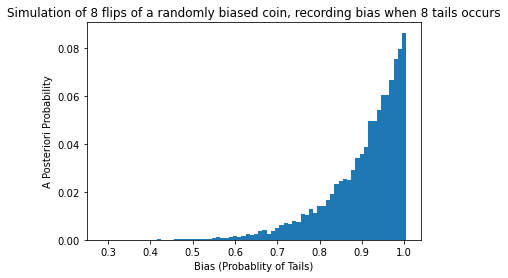

In [53]:
events = biased_coins_u()

As might be expected,  the *a posteriori* probabilities are largest for those biases that are closest to 1, since these large biases are most likely to result in getting 8 heads on 8 flips of a biased coin. By changing the weights, we can create a much more general *a priori* model than we had before. However, we have introduced a new problem:

**How can we turn the *a posteriori* probabilities into a statistical test --  i.e., how can we make a decision about whether the coin could be a fair coin based on the *a posteriori* information?**

A typical approach is to find whether the fair coin ($B=0.5$) is within a certain range of values where *almost all* of the *a posteriori* probability lies. We call such a region a *credible interval*:

````{panels}
DEFINITION
^^^
```{glossary}
credible interval
  A $C$% *credible interval* is an interval of values that contains $C$% of the *a posteriori* probability.
```
````

Note that it is possible to choose possible credible intervals. In this book, we will always generate *equal-tailed intervals*. In probability, the *tails* correspond to the values above and below the region that contains most of the probability. For an equal-tail credible intervale, the set of values below the credible interval have the same probability as the set of values above the credible interval. For more discussion on types of credible intervals, see https://en.wikipedia.org/wiki/Credible_interval.

```{warning}
*Credible intervals* are generated in Bayesian statistics using *a posteriori* probabilities. Be careful not to confuse them with *confidence intervals*, which can be generated in frequentist approaches. 

* Credible intervals have a straight-forward interpretation: the probability that a value of interest lies withing a $C$% credible interval is $C$%. 
* Confidence intervals do not have such a straight-forward interpretation: a 95% confidence interval implies that if an experiment were run again, generating independent results, then there would be a 95% chance that resulting confidence interval would contain the true value.
* Both confidence intervals and credible intervals can be generated using a model-based or model-free approach. If you 
* Credible intervals and confidence intervals will be the same under certain conditions, including that an uninformative prior is used that has equal probabilities (or equivalent for continuous priors).


```



Here are two basic approaches to finding the 95% credible interval without assuming anything about the distribution of the data (i.e., it is model-free):

**Credible Interval Calculation -- Way 1**

Consider the histogram produced by `biased_coins_u()`. To find the $C$% credible interval, we would like to find the tail regions of the histogram plot that contain $(1-C)/2$% of the probability. The histogram we created is showing (estimated) probabilities, but we are really asking about the *sums* of the probabilities in the tails of the histogram. We can overcome these issues if we instead plot a running sum of the probabilities; i.e., for each $x$, we do not plot $P(x)$, but we instead plot

$$
\sum_{w \le x} P(w).
$$

These are also called the *cumulative probabilities*, and Matplotlib's `hist` function has a `cumulative` keyword option. When both `cumulative = True` and `density = True` are used, the histogram will show estimates of the cumulative probabilities:

(array([8.70549317e-05, 1.74109863e-04, 2.61164795e-04, 4.35274658e-04,
        6.09384522e-04, 1.04465918e-03, 1.56698877e-03, 2.61164795e-03,
        3.91747192e-03, 6.70322974e-03, 9.75015235e-03, 1.50605032e-02,
        1.95003047e-02, 2.95116218e-02, 4.43980151e-02, 6.55523635e-02,
        9.40193262e-02, 1.32410551e-01, 1.62966832e-01, 2.29825020e-01,
        3.09132062e-01, 4.17863672e-01, 5.71167407e-01, 7.58683729e-01,
        1.00000000e+00]),
 array([0.29  , 0.3184, 0.3468, 0.3752, 0.4036, 0.432 , 0.4604, 0.4888,
        0.5172, 0.5456, 0.574 , 0.6024, 0.6308, 0.6592, 0.6876, 0.716 ,
        0.7444, 0.7728, 0.8012, 0.8296, 0.858 , 0.8864, 0.9148, 0.9432,
        0.9716, 1.    ]),
 <a list of 25 Patch objects>)

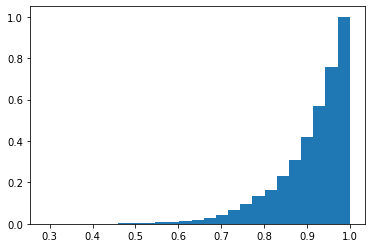

In [104]:
plt.hist(events, bins=25, cumulative=True, density=True)

Since our prior values come from a discrete set, we need to estimate the cumulative probabilities on that same set. We can do this by augmenting the set of possible prior values as the bins in the histogram using the `bins` parameter of `pyplotl.hist()`. Referring to the documentation for `pyplot.hist()`, when bin edges are specified the rightmost bin is inclusive of both endpoints -- thus if we use `allcoins` as our bins, then the last bin would include both 0.99 and 1.0. Thus, we just need to add a value higher than 1 to our list. Here we use a generic approach, where we find the spacing between the last two values and add a new value that is higher than the previous maximum value by that spacing:

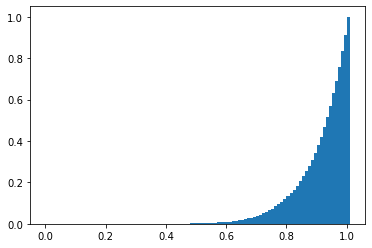

In [111]:
# Generate the set of possible biases
allcoins=np.linspace(0,1,101)
spacing = allcoins[-1] - allcoins[-2]
coin_bins=np.hstack( (allcoins, allcoins[-1] + spacing) )



plt.hist(events, bins = coin_bins, cumulative = True, density = True);

Note that the cumulative histogram is much smoother than the regular histogram. That is usually true, and it occurs because the summing operations acts to smooth out variations in the data.

Now let's add some lines to delimit the credible interval and the tails. Note that a line with  probability $x$ above it corresponds to a line with probability $1-x$ below it. Thus, for a $C$% credible interval, we want to draw lines corresponding to $(100-C)/2$% and $\left[100 - (100-C)/2\right]$%. For instance for a 90% credible interval, these correspond to $(100-95)/2 = 2.5$% and $100-2.5 = 97.5%$, respectively. 

We can easily make a line at each of these values by just repeating a value in a list:

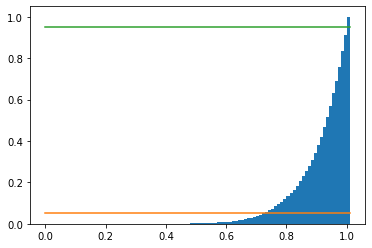

In [112]:
# Generate the set of possible biases
allcoins=np.linspace(0,1,101)
spacing = allcoins[-1] - allcoins[-2]
coin_bins=np.hstack( (allcoins, allcoins[-1] + spacing) )

plt.hist(events, bins = coin_bins, cumulative = True, density = True);
plt.plot(coin_bins, [0.05]*len(coin_bins))
plt.plot(coin_bins, [1-0.05]*len(coin_bins))

And we would like to find the values that correspond to those thresholds. Since our input space is discrete, we must choose one of the values that has a cumulative relative frequency close to the target threshold; in general, we will not get that target threshold exactly, so we can just choose the closets value. To  do this, we capture the output from `plt.hist()`, which as we previously introduced, consists of the cumulative relative frequencies, the bins, and a set of patches used to construct the histogram. We only care about the first of these.

Let's start by getting the relative frequencies and plotting the **absolute** differences between the relative frequencies and the thresholds for the 90% credible interval:

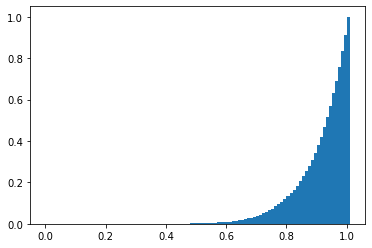

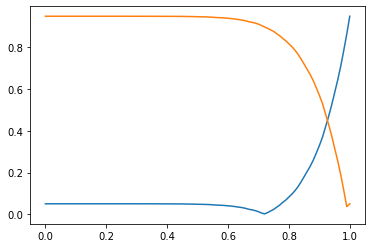

In [93]:
cum_probs, bins, patches = plt.hist(events, bins = coin_bins, cumulative = True, density = True);
plt.figure()
# We have to  
plt.plot(coin_bins[:-1], np.abs(cum_probs -0.05))
plt.plot(coin_bins[:-1], np.abs(cum_probs -0.95))

For this set of data, can find the biases that minimize the absolute errors to the thresholds by using `np.argmin()` to find the index of the minimum value and then use that index to find the corresponding value of the bias:

In [96]:
lower_index = np.abs(cum_probs - 0.05).argmin()
upper_index = np.abs(cum_probs - 0.95).argmin()
print(f'Lower threshold = {coin_bins[lower_index]}')
print(f'Upper threshold = {coin_bins[upper_index]}')


Lower threshold = 0.72
Upper threshold = 0.99



However, this will not work in general. For instance, if we had cumulative probabilities like this:

In [260]:
probs_test = np.array([0,0,0.5, 0.25, 0.25, 0])
cum_probs_test= np.cumsum(probs_test)
lower_index = np.abs(cum_probs_test - 0.05).argmin()
upper_index = np.abs(cum_probs_test - 0.95).argmin()
print(lower_index, upper_index)

                 

0 4


Then  the returned lower threshold of 0 corresponds to a value with 0 probability. The problem is that we need to only return value that have nonzero probability, which in our case corresponds to that value occurring in our data. A simple solution is to not pass in the set of **possible** biases, but instead use `np.unique()` to find the set of biases that **actually occurred**:

In [274]:
data_test=np.array([2,3,2,4])
values=np.unique(data_test)
print(values)

[2 3 4]


We can then use the set of observed values to determine the bins.

Let's put this all together into a function to do all these step for any credible value, $C$. The functions inputs will be the possible values, the observed data, and a desired credible value, $C$.
The function will plot the histogram with the threshold lines and print out the credible interval in stanard form, $[a,b]$. 

In [278]:
def credible_interval(data, C):
    ''' Find the C% credible interval given data'''
    
    # Calculate the thresholds
    lower_thresh = (1 - C / 100) / 2
    upper_thresh = 1 - lower_thresh
    
    values=np.unique(data)
    spacing = np.min(values[1:] - values[:-1])
    value_bins=np.hstack( (values, values[-1] + spacing) )
    
    # Generate the histogram and store the cumulative relative frequencies
    plt.figure()
    cum_probs, bins, patches = plt.hist(data, bins = value_bins, cumulative = True, density = True);


    # Draw the threshold lines for the credible interval
    plt.plot(values, [lower_thresh] * len(values), 'r')
    plt.plot(values, [upper_thresh] * len(values), 'g')
    
    # Find the values that correspond to the lower and upper ends of the credible interval:
    lower_index = np.abs(cum_probs - lower_thresh).argmin()
    upper_index = np.abs(cum_probs - upper_thresh).argmin()

    print(f"The {C}% credible interval is [{values[lower_index]}, {values[upper_index]}].")

Let's make sure the function is working by applying it to our observed coin data with a 90% credible interval:



The 90% credible interval is [0.72, 0.99].


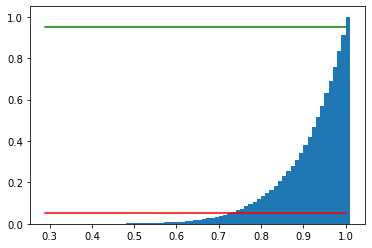

In [279]:
allcoins=np.linspace(0, 1, 101)

credible_interval(events, 90)

If we increase the credible value to 95%, then we get the following:

The 95% credible interval is [0.67, 1.0].


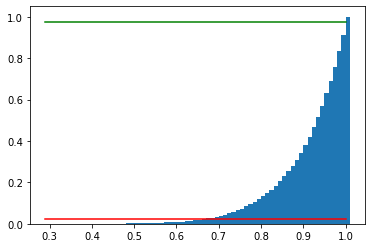

In [280]:
credible_interval( events, 95)

As $C$ increases, the confidence interval gets wider:

The 99% credible interval is [0.55, 1.0].


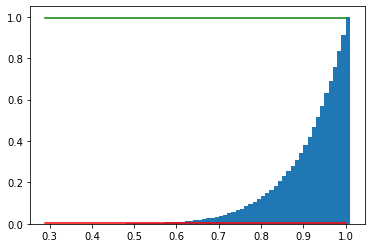

In [281]:
credible_interval( events, 99)

Now we return to our original question: how can we use this to conduct a statistical test for whether the coin could be unbiased? The approach we will use is to evaluate if the unbiased coin is in a $C$% credible interval, where typically $C$% is 95% or 99%. For either the 95% credible interval or 99% credible interval, the the unbiased coin ($b=0.5$) is not within the credible interval, so we reject the possibility that the coin is unbiased because it does not belong to the respective credible interval. 

Before we consider an informative prior, we present a short-cut technique to finding a credible interval from *a posteriori* observations of a statistic:




**Credible Interval Calculation -- Way 2**

Finding the credible interval from the cumulative histogram has the advantages that it is intuitive and it provides a graphical check of the computed credible interval. However, it also has the disadvantage that it does a lot of manipulation in doing the counting and plotting of the histogram if that is not necessarily desired.

A more direct approach is that if we want to find a threshold that $x$% of the data is less than or equal to, we can simply sort the data and then find the value that is $x$% through the sorted data. Similarly, the value that defines the upper end of the confidence interval can be found as that value that is $x$% from the upper end of the sorted data. If there are $N$ points, then the value that is $C/2$% of the way through the sorted data is the value closest to the index $Nx/100$. A function that finds the credible interval based on this technique is below:


In [165]:
def credible_interval2(data, C):
    ''' Find the C% confidence interval given data'''
    
    # probability to be in each tail of the data
    tail_prob=(1-C/100)/2 
    
    datalen=len(data)
    tail_length=int(datalen*tail_prob)

    
    sorted=np.sort(data)
    
    # Note that position 0 is the first element from the left, but position -1 is the
    # first element from the right, so we have to subtract 1 from -tail_length to get
    # the correct value  on the right-hand side:
    
    print(f'The {C}% confidence interval is [{sorted[tail_length]}, {sorted[-tail_length-1]}]')

Note the the results may have very slight differences at the endpoints of the intervals:

In [161]:
for C in [90, 95, 99]:
    credible_interval2(events, C)  

The 90% confidence interval is [0.72, 1.0]
The 95% confidence interval is [0.67, 1.0]
The 99% confidence interval is [0.56, 1.0]


### Informative prior

Now let's again assume that at least 99% of the coins in circulation are fair coins (i.e., with bias $B=0.5$). We will assign $P(B=0.5)=0.99$. Then we still have to choose a model for how the remaining 0.01 probability will be distributed among the other biases. Let's just assign it evenly. There are 100 other biases, so we will assign each one a probability of $0.01/100 = 10^{-4}$:

In [218]:
bias_probs=np.full(101, 1e-4)
bias_probs[ np.where(allcoins == 0.5) ] =0.99
print(np.sum(bias_probs))

0.9999999999999999


Because of floating point approximations, the sum computes to ever so slightly less than 1, but we know that it is in fact 1, and this numerical error will not have any significant effect on our statistical test. 

Now, let's use `random.choices()` to choose values according to these probabilities and then  plot the probabilities. Since we are dealing with four orders of magnitude (from close to 1 down to $10^{-4}$), we will use a logarithmic $y$-axis by calling the Matplotlib function `plt.semilogy()`:

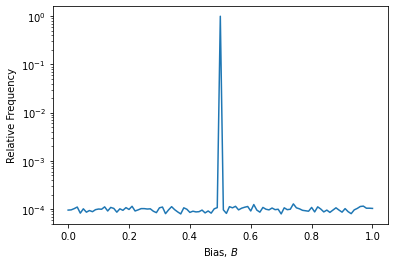

In [221]:
num_pts = 1_000_000
test=np.array(random.choices(allcoins, weights=weights, k=num_pts))

values, counts = np.unique(test, return_counts=True)

plt.semilogy(values, counts/num_pts)
plt.xlabel('Bias, $B$')
plt.ylabel('Relative Frequency');





The relative frequencies closely match the probabilities, so we are ready to carry out a statistical test using this informative prior.

Copy the function `biased_coins_u()` from above and change the name to `biased_coins_i`, where the *u* and *i* stand for uninformative and informative, respectively. Make the function have a keyword parameter called `a_prioris` as its first argument. Then change the coin generation to use `random.choices()` as shown above. The resulting code follows:

In [225]:
def biased_coins_i(a_prioris, flips=8, target=8, num_sims=100_000):
    ''' Simulate randomly choosing the bias for a coin (from 0 to 100 by 0.01) and
    then flipping the coin 8 times. Wheneve it comes up tails 8 times, record
    that coin's bias.  As before, the relative frequencies of the biases in the resulting set
    approximate the *a posteriori* probability of those biases. '''
    
    # Generate the set of possible biases
    allcoins=np.linspace(0,1,101)
    
    events=[]
    for sim in range(num_sims):
        
        # Choose a bias for this coin
        B=random.choices(allcoins, weights=weights)[0]
        
        # Now generate the coins according to that bias and count the number of heads
        coins = random.choices( ['H', 'T'], weights=[1 - B, B], k = flips)
        num_tails = coins.count('T')
        
        # Record the events with the target number of tails
        if num_tails==target:
            events+=[B]

    # Use the np.unique function (introduced in Ch. 2) to return the values and their counts
    vals,counts=np.unique(events,return_counts=True)
    
    # Now manually generate a histogram using plt.bar 
    # The relative frequency of a given value is the count of that value divided
    # by the total number of captured events
    plt.bar(vals,counts/len(events),width=0.01) # Note that we had to change the bar width here!!!
    plt.title(f'Simulation of {flips} flips of a randomly biased coin, recording bias when {target} tails occurs');
    plt.xlabel('Bias (Probablity of Tails)')
    plt.ylabel('A Posteriori Probability');
    
    return events

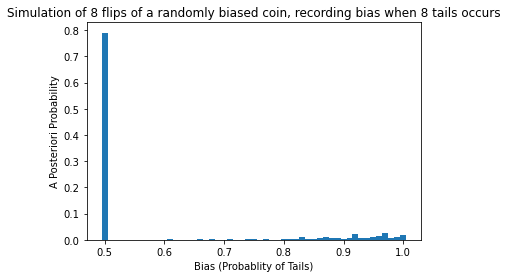

In [226]:
events2 = biased_coins_i(bias_probs)

Even before we generate the confidence intervals, we can see that with the *a priori* probability of a fair coin being 0.99, most of the coins that result in 8 tails on 8 flips of the coin are actually fair coins. Thus, we expect that any confidence intervals that we consider will include the fair coin.

We can directly pass `events2` to our function `credible_interval` to generate the plots and credible intervals:

The 90% credible interval is [0.5, 0.96].
The 95% credible interval is [0.5, 0.98].
The 99% credible interval is [0.5, 1.0].


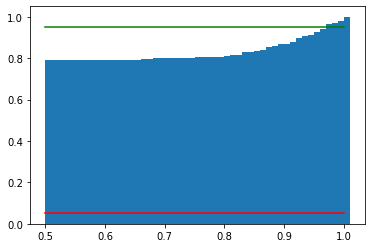

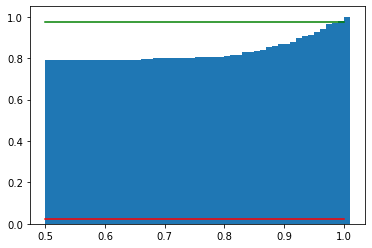

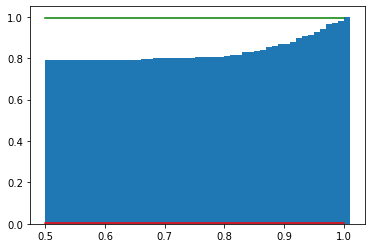

In [282]:
for C in [90, 95, 99]:
    credible_interval( events2, C)

Since the credible interval contains 0.5 in each of these cases, we cannot reject the possibility that the coin is fair. We can easily estimate the *a posteriori* probability of the coin being fair:

In [288]:
np.count_nonzero(np.array(events2) == 0.5) / len(events2)

0.790650406504065

Thus, even given that we observed 8 tails on 8 flips of the coin, the probability that the coin is a fair coin is almost 0.8. This is because of the large prevalence of fair coins in our model for the *a priori* probabilities.

In [293]:
from jupytercards import display_flashcards
display_flashcards("flashcards/bayesian-hypothesis-testing.json")

## Remaining Items

1. Add example with real data
1. Talk about Likelihood ratio/Bayes factors and interpretation
1. Add JupyterQuiz questions on credible intervals, other simple random experiments with Bayesian tests 